In [220]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import robust
%matplotlib inline

In [221]:
## Para encontrar ruta exacta, ya que el nombre del archivo no me abria por que usaba guion 
from pathlib import Path
filename= Path('C:\\Users\\pedro\\Downloads\\applemobilitytrends.csv')

filename

WindowsPath('C:/Users/pedro/Downloads/applemobilitytrends.csv')

In [222]:
datapple = pd.read_csv("C:\\Users\\pedro\\Downloads\\applemobilitytrends.csv")

C:\Users\pedro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [223]:
datapple.head(3)

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09,2021-12-10,2021-12-11,2021-12-12,2021-12-13,2021-12-14
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,162.12,156.23,150.23,171.58,159.52,173.82,170.79,154.11,156.63,145.56
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,156.72,191.94,208.66,244.65,203.88,221.58,189.47,159.06,233.01,216.16
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,91.97,97.89,128.10,98.74,115.38,142.73,153.72,89.45,100.86,105.01


In [224]:
Datos1=datapple[datapple["geo_type"]=="country/region"]
Datos1.drop(["alternative_name","sub-region","country","geo_type",],axis=1,inplace=True)
Datos1

C:\Users\pedro\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,...,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09,2021-12-10,2021-12-11,2021-12-12,2021-12-13,2021-12-14
0,Albania,driving,100.0,95.30,101.43,97.20,103.55,112.67,104.83,94.39,...,162.12,156.23,150.23,171.58,159.52,173.82,170.79,154.11,156.63,145.56
1,Albania,walking,100.0,100.68,98.93,98.46,100.85,100.13,82.13,95.65,...,156.72,191.94,208.66,244.65,203.88,221.58,189.47,159.06,233.01,216.16
2,Argentina,driving,100.0,97.07,102.45,111.21,118.45,124.01,95.44,95.13,...,91.97,97.89,128.10,98.74,115.38,142.73,153.72,89.45,100.86,105.01
3,Argentina,walking,100.0,95.11,101.37,112.67,116.72,114.14,84.54,101.37,...,71.43,102.94,122.42,84.15,114.29,135.13,125.15,67.77,104.04,107.03
4,Australia,driving,100.0,102.98,104.21,108.63,109.08,89.00,99.35,103.53,...,121.15,124.25,128.52,138.88,146.07,142.32,119.83,130.54,133.84,141.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,United States,walking,100.0,99.59,101.87,100.60,121.36,132.38,100.10,94.79,...,145.03,143.51,146.44,150.56,160.56,202.30,223.74,149.82,146.56,148.73
149,Uruguay,driving,100.0,96.84,92.90,103.48,114.91,115.03,99.48,93.30,...,85.88,92.31,100.00,100.07,102.66,137.76,151.72,95.88,95.78,102.10
150,Uruguay,walking,100.0,94.90,78.04,100.46,105.04,98.78,76.52,89.94,...,67.79,100.52,122.10,111.20,112.91,133.30,126.22,78.99,107.46,116.43
151,Vietnam,driving,100.0,104.96,108.67,107.09,121.07,130.40,123.99,122.77,...,100.29,93.76,95.12,97.06,97.75,110.90,121.99,105.87,100.04,99.67


In [225]:
DfChile=Datos1[Datos1["region"]=="Chile"]
DfChile

,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,...,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09,2021-12-10,2021-12-11,2021-12-12,2021-12-13,2021-12-14
22,Chile,driving,100.0,99.01,102.57,106.47,124.69,120.83,97.12,102.53,...,106.04,118.25,137.21,112.95,137.00,166.06,153.41,104.79,124.38,126.09
23,Chile,walking,100.0,102.58,103.13,103.74,107.87,86.73,59.44,99.53,...,79.77,129.48,144.41,95.62,144.52,159.74,132.99,79.39,130.18,133.61


In [226]:
Datos_ordenados=DfChile.melt(id_vars=["region","transportation_type"],var_name="fecha")
Datos_ordenados

,region,transportation_type,fecha,value
0,Chile,driving,2020-01-13,100.00
1,Chile,walking,2020-01-13,100.00
2,Chile,driving,2020-01-14,99.01
3,Chile,walking,2020-01-14,102.58
4,Chile,driving,2020-01-15,102.57
...,...,...,...,...
1399,Chile,walking,2021-12-12,79.39
1400,Chile,driving,2021-12-13,124.38
1401,Chile,walking,2021-12-13,130.18
1402,Chile,driving,2021-12-14,126.09


In [227]:
Datos_ordenados['fecha'] = pd.to_datetime(Datos_ordenados['fecha'], errors = 'coerce')
Datos_ordenados

,region,transportation_type,fecha,value
0,Chile,driving,2020-01-13,100.00
1,Chile,walking,2020-01-13,100.00
2,Chile,driving,2020-01-14,99.01
3,Chile,walking,2020-01-14,102.58
4,Chile,driving,2020-01-15,102.57
...,...,...,...,...
1399,Chile,walking,2021-12-12,79.39
1400,Chile,driving,2021-12-13,124.38
1401,Chile,walking,2021-12-13,130.18
1402,Chile,driving,2021-12-14,126.09


In [228]:
Datos_ordenados_mes = pd.DataFrame(Datos_ordenados)
Datos_ordenados_mes['mes'] = pd.DatetimeIndex(Datos_ordenados['fecha']).month

In [229]:
Datos_ordenados_mes

,region,transportation_type,fecha,value,mes
0,Chile,driving,2020-01-13,100.00,1
1,Chile,walking,2020-01-13,100.00,1
2,Chile,driving,2020-01-14,99.01,1
3,Chile,walking,2020-01-14,102.58,1
4,Chile,driving,2020-01-15,102.57,1
...,...,...,...,...,...
1399,Chile,walking,2021-12-12,79.39,12
1400,Chile,driving,2021-12-13,124.38,12
1401,Chile,walking,2021-12-13,130.18,12
1402,Chile,driving,2021-12-14,126.09,12


In [230]:
Apple_walking=Datos_ordenados_mes[Datos_ordenados["transportation_type"]=="walking"]
Apple_driving=Datos_ordenados_mes[Datos_ordenados["transportation_type"]=="driving"]

In [231]:
Apple_walking

,region,transportation_type,fecha,value,mes
1,Chile,walking,2020-01-13,100.00,1
3,Chile,walking,2020-01-14,102.58,1
5,Chile,walking,2020-01-15,103.13,1
7,Chile,walking,2020-01-16,103.74,1
9,Chile,walking,2020-01-17,107.87,1
...,...,...,...,...,...
1395,Chile,walking,2021-12-10,159.74,12
1397,Chile,walking,2021-12-11,132.99,12
1399,Chile,walking,2021-12-12,79.39,12
1401,Chile,walking,2021-12-13,130.18,12


In [232]:
Apple_driving

,region,transportation_type,fecha,value,mes
0,Chile,driving,2020-01-13,100.00,1
2,Chile,driving,2020-01-14,99.01,1
4,Chile,driving,2020-01-15,102.57,1
6,Chile,driving,2020-01-16,106.47,1
8,Chile,driving,2020-01-17,124.69,1
...,...,...,...,...,...
1394,Chile,driving,2021-12-10,166.06,12
1396,Chile,driving,2021-12-11,153.41,12
1398,Chile,driving,2021-12-12,104.79,12
1400,Chile,driving,2021-12-13,124.38,12


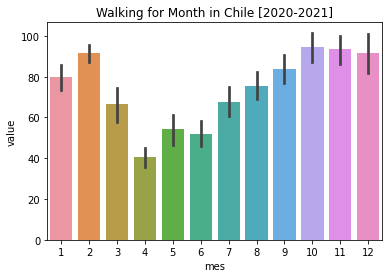

In [233]:
sns.barplot(x="mes", y="value", data=Apple_walking).set_title("Walking for Month in Chile [2020-2021]")
plt.show()

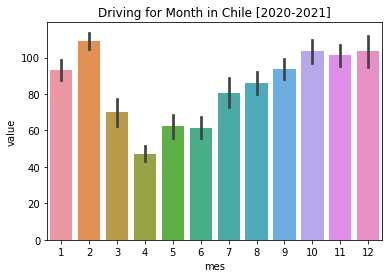

In [234]:
sns.barplot(x="mes", y="value", data=Apple_driving).set_title("Driving for Month in Chile [2020-2021]")
plt.show()

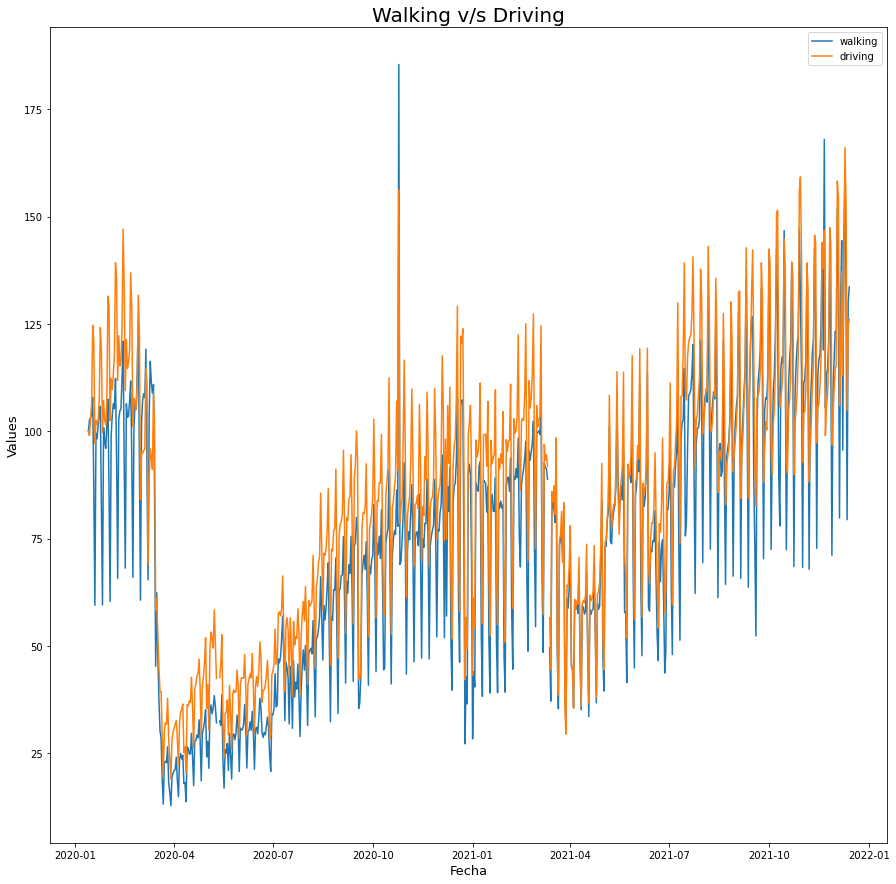

In [235]:
x=Apple_driving["fecha"]
y1 = Apple_walking["value"]
y2 = Apple_driving["value"]
plt.figure(figsize=(15,15))
plt.plot(x,y1, label='walking')
plt.plot(x,y2, label = 'driving')
plt.xlabel("Fecha",fontsize=13)
plt.ylabel("Values",fontsize=13)
plt.legend(fontsize=10)
plt.title('Walking v/s Driving',fontsize=20)
plt.show()

# no se observan diferencias significativas entre la forma de movilidad en cuarentena, ya que tanto walking como Driving responden al comportamiento por la fecha (y a su vez si habia cuartena) y no por el tipo de movilidad.  

In [236]:
dfgoogle = pd.read_csv('C:/Users/pedro/Downloads/GlobalMobilityReport.csv')

C:\Users\pedro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [237]:
dfgoogle

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8005089,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-12-06,NaN,NaN,NaN,NaN,38.0,NaN
8005090,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-12-07,NaN,NaN,NaN,NaN,42.0,NaN
8005091,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-12-08,NaN,NaN,NaN,NaN,39.0,NaN
8005092,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-12-09,NaN,NaN,NaN,NaN,37.0,NaN


In [238]:
dfchile=dfgoogle[dfgoogle["country_region"]=="Chile"]
dfchile.drop(["country_region_code","sub_region_1","sub_region_2","iso_3166_2_code","census_fips_code","place_id","retail_and_recreation_percent_change_from_baseline","metro_area","grocery_and_pharmacy_percent_change_from_baseline","transit_stations_percent_change_from_baseline","workplaces_percent_change_from_baseline","residential_percent_change_from_baseline"],axis=1,inplace=True)

C:\Users\pedro\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [239]:
dfchile

,country_region,date,parks_percent_change_from_baseline
2220664,Chile,2020-02-15,9.0
2220665,Chile,2020-02-16,5.0
2220666,Chile,2020-02-17,11.0
2220667,Chile,2020-02-18,13.0
2220668,Chile,2020-02-19,11.0
...,...,...,...
2267648,Chile,2021-12-08,-9.0
2267649,Chile,2021-12-09,-19.0
2267650,Chile,2021-12-10,-16.0
2267651,Chile,2021-12-11,-25.0


In [240]:
dfchile['date'] = pd.to_datetime(dfchile['date'], errors = 'coerce')
dfchile

<ipython-input-240-a4a6df08d4c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfchile['date'] = pd.to_datetime(dfchile['date'], errors = 'coerce')


,country_region,date,parks_percent_change_from_baseline
2220664,Chile,2020-02-15,9.0
2220665,Chile,2020-02-16,5.0
2220666,Chile,2020-02-17,11.0
2220667,Chile,2020-02-18,13.0
2220668,Chile,2020-02-19,11.0
...,...,...,...
2267648,Chile,2021-12-08,-9.0
2267649,Chile,2021-12-09,-19.0
2267650,Chile,2021-12-10,-16.0
2267651,Chile,2021-12-11,-25.0


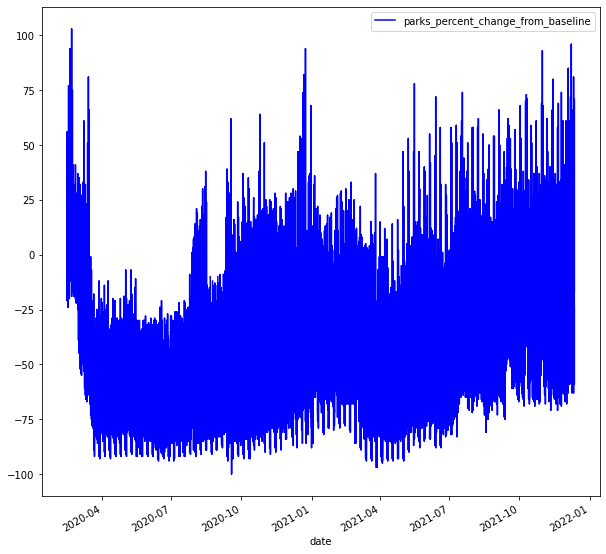

In [248]:
Grafi = dfchile.plot(x='date', y='parks_percent_change_from_baseline', kind="line",figsize=(10,10), color = 'b')